In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [69]:
df=pd.read_csv('vehicles_dataset.csv')

In [70]:
df.shape

(1002, 18)

In [72]:
df.drop(columns=['name','description'],inplace=True,axis=1)

In [73]:
df.head()

,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


Price Distribution by Make:

Plot the distribution of vehicle prices for each make. Identify which make has the highest average price and which has the lowest.

Average Mileage by Fuel Type:

Calculate and plot the average mileage for each fuel type. Determine if there is a significant difference in mileage among the different fuel types.

Price Trend Over Years:

Plot the trend of average vehicle prices over the years. Analyze if there is an increasing or decreasing trend and identify any anomalies.

Engine Size Distribution by Vehicle Type:

Visualize the distribution of engine sizes across different vehicle types. Identify which vehicle type typically has the largest and smallest engines.

Fuel Efficiency Comparison by Cylinders:

Compare the fuel efficiency (mileage) of vehicles with different numbers of cylinders using a box plot. Determine if vehicles with fewer cylinders generally have higher mileage.

Transmission Type Popularity:

Plot the count of vehicles with different transmission types. Identify which transmission type is most and least popular.

Price vs. Mileage Scatter Plot:

Create a scatter plot of vehicle price vs. mileage. Analyze the relationship between price and mileage, and identify any trends or clusters.

Body Type Distribution:

Plot the distribution of different body types in the dataset. Determine the most and least common body types.

Drivetrain Popularity Over Years:

Plot the number of vehicles with different drivetrain types (e.g., AWD, FWD, RWD) over the years. Identify if any drivetrain type is becoming more or less popular over time.

Top 5 Exterior Colors by Price:

Identify the top 5 most common exterior colors and plot their average prices. Determine if there is a significant price difference among these colors.

In [76]:
df['make'].unique()

array(['Jeep', 'GMC', 'Dodge', 'RAM', 'Nissan', 'Ford', 'Hyundai',
       'Chevrolet', 'Volkswagen', 'Chrysler', 'Kia', 'Mazda', 'Acura',
       'Subaru', 'Audi', 'BMW', 'Toyota', 'Buick', 'Mercedes-Benz',
       'Honda', 'Lincoln', 'Cadillac', 'INFINITI', 'Lexus', 'Land Rover',
       'Volvo', 'Genesis', 'Jaguar'], dtype=object)

In [86]:
make_by_price=df.groupby('make')['price'].mean().reset_index()

In [83]:
make_by_price['price'] = make_by_price['price'].apply(lambda x: f'RS: {x:.2f}')

In [84]:
make_by_price

,make,price
0,Acura,RS: 56790.42
1,Audi,RS: 74360.62
2,BMW,RS: 91366.39
3,Buick,RS: 36458.38
4,Cadillac,RS: 60502.50
5,Chevrolet,RS: 46531.24
6,Chrysler,RS: 47070.60
7,Dodge,RS: 43953.02
8,Ford,RS: 49515.42
9,GMC,RS: 61221.30


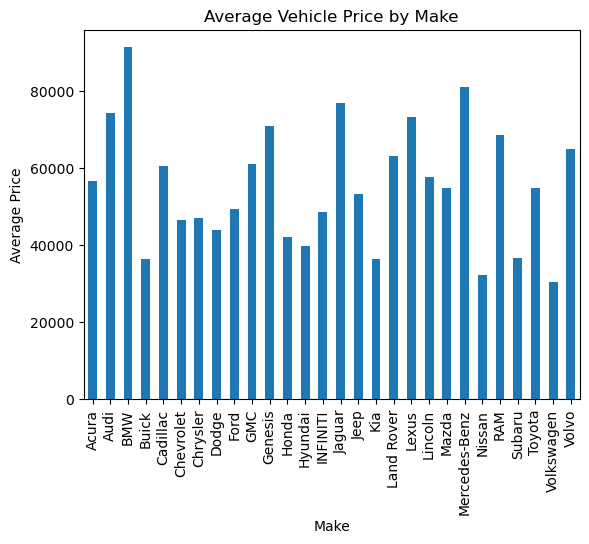

In [94]:
make_by_price.plot(kind='bar', x='make', y='price', legend=False)
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.title('Average Vehicle Price by Make')
plt.show()

In [92]:
max=make_by_price[make_by_price['price']==make_by_price['price'].max()]
min=make_by_price[make_by_price['price']==make_by_price['price'].min()]


,make,price
26,Volkswagen,30376.421053


In [95]:
aveatemilage_by_fules=df.groupby('fuel')['mileage'].mean().reset_index()

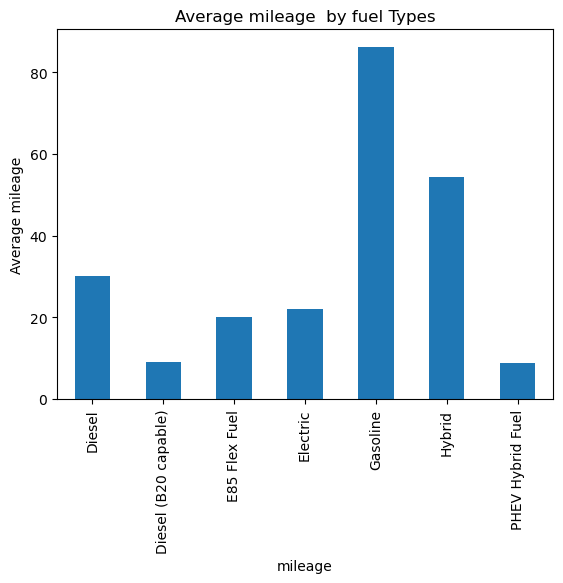

In [97]:
aveatemilage_by_fules.plot(kind='bar', x='fuel', y='mileage', legend=False)
plt.xlabel('mileage')
plt.ylabel('Average mileage')
plt.title('Average mileage  by fuel Types')
plt.show()

Yes there is significance difference amoung milage for all fuels 

In [98]:
years_by_price=df.groupby('year')['price'].mean().reset_index()

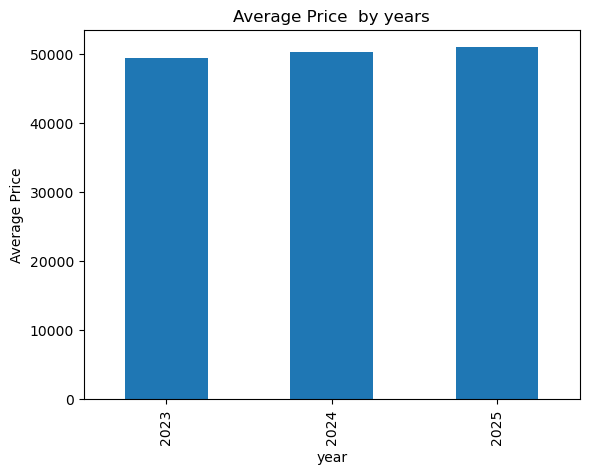

In [100]:
years_by_price.plot(kind='bar', x='year', y='price', legend=False)
plt.xlabel('year')
plt.ylabel('Average Price')
plt.title('Average Price  by years')
plt.show()

SO years goes on price is Increasing 

In [102]:
price_increasing = years_by_price['price'].is_monotonic_increasing
print("Is the average price increasing year by year?:", price_increasing)

Is the average price increasing year by year?: True


In [103]:
df.head()

,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


Compare the fuel efficiency (mileage) of vehicles with different numbers of cylinders using a box plot. Determine if vehicles with fewer cylinders generally have higher mileage

In [111]:
df[df['mileage']>100]

,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
5,Nissan,Murano,New,2024,46000.0,24V MPFI DOHC,6.0,Gasoline,3838.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive
11,RAM,3500,New,2024,60904.0,oled Turbo Diesel I-6 6.7 L/408,6.0,Diesel,532.0,Automatic,Tradesman,Pickup Truck,4.0,Granite Crystal Metallic Clearcoat,Black,Four-wheel Drive
20,RAM,3500,New,2024,65221.0,oled Turbo Diesel I-6 6.7 L/408,6.0,Diesel,344.0,Automatic,Tradesman,Pickup Truck,4.0,Bright White Clearcoat,Black,Four-wheel Drive
32,Jeep,Grand Cherokee 4xe,New,2023,59547.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,185.0,8-Speed Automatic,Trailhawk,SUV,4.0,Diamond Black,Global Black,Four-wheel Drive
67,Toyota,Tundra Hybrid,New,2024,62341.0,"MAX 3.4L V-6 port/direct injection, DOHC, vari...",6.0,Hybrid,4357.0,10-Speed Automatic,Limited,Pickup Truck,4.0,Ice Cap,Black,Four-wheel Drive
86,Mercedes-Benz,EQE 350+,New,2024,76535.0,c,NaN,Electric,375.0,1-Speed Automatic,Base,Sedan,4.0,Polar White,Gray,Rear-wheel Drive
106,Chevrolet,Silverado 1500,New,2024,54559.0,16V GDI OHV,8.0,Gasoline,148.0,Automatic,RST,Pickup Truck,4.0,Sterling Gray Metallic,Jet Black,Four-wheel Drive
247,Jeep,Grand Cherokee L,New,2024,52567.0,OHV,6.0,Gasoline,246.0,8-Speed Automatic,Limited,SUV,4.0,Velvet Red Pearlcoat,Global Black,Four-wheel Drive
280,Dodge,Hornet,New,2024,34000.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,4440.0,9-speed automatic,GT AWD,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
282,Ford,F-350,New,2024,77885.0,16V MPFI OHV,8.0,Gasoline,105.0,10-Speed Automatic,Lariat Super Duty,Pickup Truck,4.0,Black,Black Onyx,Four-wheel Drive


Text(0.5, 1.0, 'Mileage Comparison by Number of Cylinders')

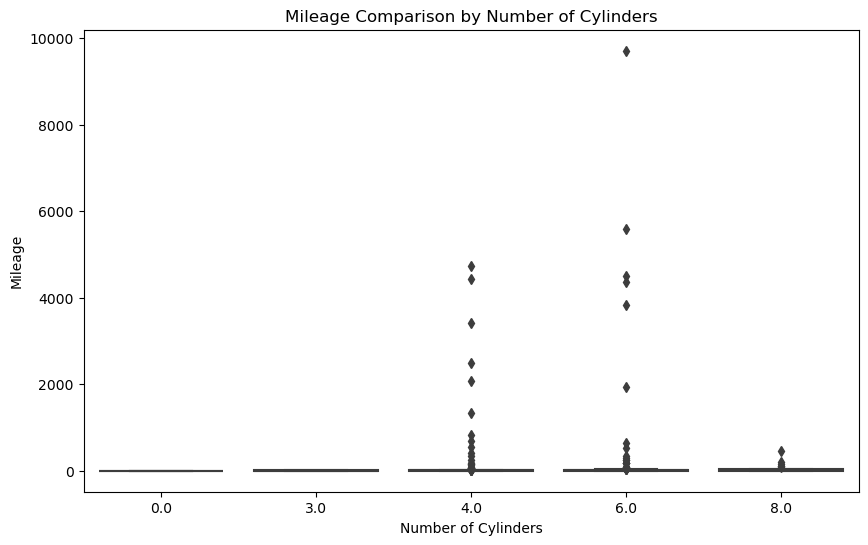

In [105]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='cylinders', y='mileage', data=df)
plt.xlabel('Number of Cylinders')
plt.ylabel('Mileage')
plt.title('Mileage Comparison by Number of Cylinders')

Plot the count of vehicles with different transmission types. Identify which transmission type is most and least popular.

In [116]:
transmission_counts = df['transmission'].value_counts().reset_index()
transmission_counts.columns = ['transmission', 'count']

In [117]:
transmission_counts

,transmission,count
0,8-Speed Automatic,325
1,Automatic,236
2,6-Speed Automatic,98
3,1-Speed Automatic,69
4,9-Speed Automatic,62
5,10-Speed Automatic,58
6,Automatic CVT,45
7,8-Speed Automatic with Auto-Shift,17
8,7-Speed DSGA? Automatic w/ 4MO,11
9,8-Speed Automatic with Tiptronic,10


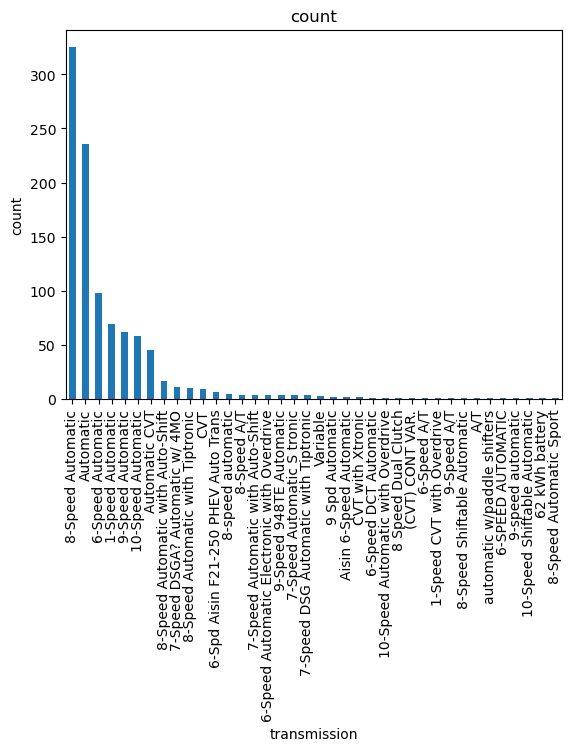

In [119]:
transmission_counts.plot(kind='bar', x='transmission', y='count', legend=False)
plt.xlabel('transmission')
plt.ylabel('count')
plt.title('count')
plt.show()

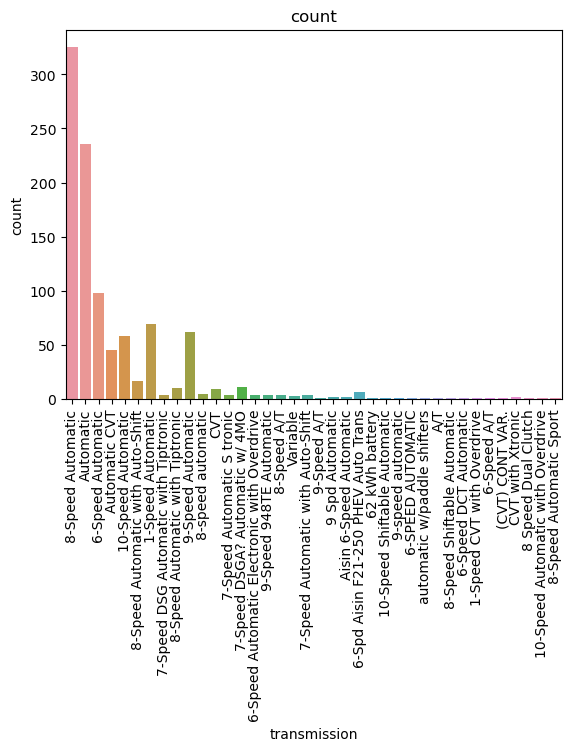

In [124]:
sb.countplot(x='transmission',data=df)
plt.xlabel('transmission')
plt.ylabel('count')
plt.title('count')
plt.xticks(rotation=90)
plt.show()

In [125]:
df.isna().sum()

make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [130]:
df[df['doors'].isnull()]

,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain


In [129]:
df['doors'].fillna(df['doors'].mode()[0], inplace=True)

In [131]:
df.iloc[124]

make                      Hyundai
model                    Santa Fe
type                          New
year                         2024
price                     49905.0
engine                 Turbo DOHC
cylinders                     4.0
fuel                     Gasoline
mileage                       1.0
transmission            Automatic
trim                  Calligraphy
body                          SUV
doors                         4.0
exterior_color              Green
interior_color              Black
drivetrain        All-wheel Drive
Name: 124, dtype: object